In [3]:
import re
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import spacy
nlp = spacy.load('en')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from wordcloud import WordCloud, STOPWORDS
import random

# To dislay the whole data string
pd.options.display.max_colwidth = -1

## Loading the data

In [4]:
data_path = 'dataAmazonReviews.csv'
df = pd.read_csv(data_path)

In [5]:
# Check for duplicates and null values 
df = df.drop_duplicates()

In [6]:
df[pd.notnull(df['Title']) == False]

,Title,Review,Score


In [7]:
df[pd.notnull(df['Review']) == False]

,Title,Review,Score


In [8]:
df[pd.notnull(df['Score']) == False]

,Title,Review,Score


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 0 to 3418
Data columns (total 3 columns):
Title     3417 non-null object
Review    3417 non-null object
Score     3417 non-null int64
dtypes: int64(1), object(2)
memory usage: 106.8+ KB


## Explore the data set

Explore some examples of the data set to get an idea of how the examples are and to spot any strange aspect.

In [10]:
df.head(50)

,Title,Review,Score
0,My parcel arrived in 7 days and it was…,My parcel arrived in 7 days and it was exactly as advertised. I would like the delivery to be faster :),4
1,Amazon Customer service no 8292175682📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱,Amazon Customer service no 8292175682📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱Amazon Customer service no 8292175682📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱Amazon Customer service no 8292175682📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱Amazon Customer service no 8292175682📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱Amazon Customer service no 8292175682📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱,4
2,Fraud deliveries,"Fraud deliveries Never got my item. Doesn't offer me anything, doesn't value me as a customer. I will complain to the local authorities about my delivery.",1
3,The customer service is terrible in…,"The customer service is terrible in Amazon. I was having trouble with being charged from Amazon for no reason. They claimed that I have the kindle membership and also the kindle music. I talked to the bank and disputed, but I got charges every month. Then I called Amazon trying to resolve the issue, they are not very cooperative. I recommend anyone who has Amazon account to check if they are charged mysteriously from them. Their stock price and revenue continue to be up, but I am question if it is because of the reason I just stated above. At the end, I gave up, I have to cancel my credit card and concluded it as a fraud to get my money back. It is a terrible process.",2
4,Hopeless delivery service,"I ordered 5 items on Sunday for delivery on Tuesday and Wednesday. An inflatable dinghy and accessories. The accessories arrived along with a drum kit, no dinghy, now I have an engine to attach to a bass drum, I doubt it will float! I sent Amazon feedback about the picture they send confirming delivery two days ago, no contact from them at all! On their website this morning, no way to contact someone, but I can return my dinghy if I wish! Chance would be a fine thing. Avoid dealing with this company, in theory the offering is good, but if you can mistake a dinghy for a drum kit, well enough said. I'll update if anyone bothers to contact me!",1
5,Amazon customer care helpline number +9118972852141/7258947836/7280995305,Amazon customer care helpline number+9118972852141/7258947836/7280995305Amazon customer care helpline number+9118972852141/7258947836/7280995305Amazon customer care helpline number+9118972852141/7258947836/7280995305Amazon customer care helpline number+9118972852141/7258947836/7280995305Amazon customer care helpline number+9118972852141/7258947836/7280995305Amazon customer care helpline number+9118972852141/7258947836/7280995305,5
6,Amazon customer care helpline number +9118972852141/7280995305/7258947836Amazon customer care helpline number +9118972852141/7280995305/7258947836Amazon customer care helpline number +9118972852141/72,Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836,5
7,I've been doing business with Amazon…,I've been doing business with Amazon for years. the is always super user friendly

In [11]:
df.tail(50)

,Title,Review,Score
3369,one of my favs,"I am an amazon addict, I do almost all my online shopping on amazon these days.",4
3370,Almost anything is available from Amazon,Visiting Amazon website is a pleasure--almost too tempting. It's easy to find what you are looking for & many items are delivered without charge. I like being able to find pre-owned books at bargain prices & being offered suggestions for what might interest me. Friends & relatives might tire of my enthusiasm if they were not as keen on Amazon as I am.,5
3371,Love itt!,i love amazon! its quick and easy! :D,5
3372,I Always Check Amazon,"Whenever I'm making a purchase, I always check prices on Amazon first. Now I have the Apple App with BarCode scanner on my iPhone4 I will have to watch I don't get kicked out of stores scanning products. :)",5
3373,Pretty Good,"Amazon has a great variety and selection of just about anything you need. They are very reliable and the orders arrive pretty quickly. I give it 4 stars and not 5 because I'm not happy with the S&H charges. I think these charges have increased dramatically. I understand an adjustment in rates due to the oil and gas prices and here's an example of what I mean: I ordered an item for $4.79 and had to pay $7.97 for S&H charges. In the same order I was charged $29.94 for a $59.94 order although the items were being shipped from different locations. I'm trying to decide whether I want to keep my order because of this. Outside of this, I love Amazon!!!",4
3374,excellent,"i have shopped with this site from usa, i worked doing their tasks, excellent, the only problem is you are limited to what you can buy, but very good and always received goods on time.",5
3375,Loving Amazon Prime,I have been spoiled with Amazon prime service. Before I occasionally bought products on Amazon with the free super saver shipping. But after my one month trial I was hooked. I piratically buy anything I can on amazon. Everything for Electronics to Cereal they got!,5
3376,great kindle experience,"my case cover was causing my kindle to reboot everytime I opened it. I called Amazon. Immediately, they refunded the case cover and deposited $60 to get a different case cover. I am happy the way they handle this matter so efficiently. They recognize the issue and provide the solution at once. Great service!",5
3377,Meh..,"Overall, not a bad company to buy from. They have almost everything in the known universe, and if you are patient and low maintenance, service is not bad. I don't think service can ever be better than not bad due to the fact that it is a mall store. I've sent maybe a dozen inquiries to various vendors and have had one response. The one response I did receive was that the vendor ""would research and get back to me"" and of course they never did. And that was regarding an order that never showed up! Luckily, Amazon does have their A-Z Guarantee. They did step in and refund my money. The layout is awful. Product descriptions are vague and not logically placed. Most seem like they are updated by mass data feed with little regard for editing or accuracy. ""Fuzzy"" would be a nice way of describing most of their product images.I have to say they among the best at taking an order. If I know exactly what I want, I can order from my computer or my phone in seconds. For browsing and research, forget it. I'll bet you a nickel it's like that by design to prevent lookey-loo's from tying up bandwith. Smart, I guess.Aside from Walmart and the IRS, I don't know of any other organization with a worse customer experience but can still continue to get my money. Overall though, not bad at serving its purpose. I do keep coming back.",4
3378,Always quick!,"I am always happy with how quickly I get my items from Amazon.com. I have even ordered from some of the smaller retailers within Amazon's network, and I always get my items quickly.",4


The exploration shows that there are emojis, a lot of punctuation (exclamation marks, etc) and some noise with examples that are spam. Then noisy examples are removed now and the data will be cleaned later.

In [12]:
# Display noisy example 
print('Removing the following noisy examples: \n')
noisy = [1, 5, 6, 10, 1245]
df.loc[noisy]  # save in dataframe to print pretty

Removing the following noisy examples: 



,Title,Review,Score
1,Amazon Customer service no 8292175682📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱,Amazon Customer service no 8292175682📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱Amazon Customer service no 8292175682📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱Amazon Customer service no 8292175682📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱Amazon Customer service no 8292175682📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱Amazon Customer service no 8292175682📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱📱,4
5,Amazon customer care helpline number +9118972852141/7258947836/7280995305,Amazon customer care helpline number+9118972852141/7258947836/7280995305Amazon customer care helpline number+9118972852141/7258947836/7280995305Amazon customer care helpline number+9118972852141/7258947836/7280995305Amazon customer care helpline number+9118972852141/7258947836/7280995305Amazon customer care helpline number+9118972852141/7258947836/7280995305Amazon customer care helpline number+9118972852141/7258947836/7280995305,5
6,Amazon customer care helpline number +9118972852141/7280995305/7258947836Amazon customer care helpline number +9118972852141/7280995305/7258947836Amazon customer care helpline number +9118972852141/72,Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836Amazon customer care helpline number+9118972852141/7280995305/7258947836,5
10,I spent a week trying to get my Amazon purchases to arrive..no luck...,"Ho passato una settimana cercando di fare arrivare i miei prodotti. Sono rimasta a casa 3 giorni per aspettarli. Sono stata scaricata da un operatore ad un altro. Il corriere Amazon si perdeva sempre e non è mai arrivata a destinazione. L'altro corriere faceva le finte consegne in rete (controllando direttamente con i responsabili di zona le consegna che risultavano a video in realtà non erano programmate) e poi cominciavano le storielline tipo 'il corriere ha forato vicino a casa sua e se n'e andato a riparare la gomma!!! ì Comodo di venerdì sera quando non riescono ad andare in consegna. Cosi mi hanno invitato ad andare in persona a ritirare la merce. Ma secondo voi se avessi voluto andare a fare lo shopping in persona sarei andata al centro commerciale vero? Invece di pagare in anticipo online - si, hanno addebitato la carta di credito e chissa se mai rivedrò i soldi per la merce mai ricevuta....pessima esperienza. Hanno problemi di logistica e di formazione personale.I spent a week trying to get my Amazon purchases to arrive. I was passed from one customer service rep to another (6 in all in 5 days). The Amazon delivery driver got lost and couldn't find the house. The first one said he would take the goods back because Amazon would contact me in any case and then they would deliver another day. The other shipper firstly put fake delivery details on his website - when I actually phoned to ask, the area manager confirmed that there was no actual delivery planned.Then after 3 days when they were supposed to turn up again (they planned the delivery for a Friday afternoon after 4.30pm) 'unfortunately' the driver got a flat tyre on the gravel road just outside my house. So he went to get it fixed. Silly boy! Why didn't he phone me??? I could hav

In [13]:
# Remove the noisy exmaples
df = df.drop([1, 5, 6, 10, 1245])

In [14]:
# Search for any other noisy examples with the same pattern 
# (these patterns can be used to find noise if more data)
df.loc[df['Review'].str.contains('\\+\d+')]

,Title,Review,Score
321,+1 no comment.,+1 no comment.,5
540,Would give ZERO star review on the …,"Would give ZERO star review on the Customer Service Call centre on number: +1 206-266-2992.The agent Steph, took 10 minutes to take my email address??? Saying ""Errrm"" every few seconds. Then I was placed on mute every few minutes until she finally came back and told me that she could not find the account but had me on hold and not telling me this.She finally passed me through to the EU offiice, she had the account found in less than 2 minutes and it IS a .com account!!I think this is appauling how it took longer than 10 minutes just to take an email address from Steph, and all the humming and ""errrr's"" I found very unprofessional. I advise NO ONE to deal with this call centre if they are all like Steph and I wouldn't even put it to a training issue, it was just the way this individual was which has wasted so much of my afternoon from something that should have been so simple!",1
1933,As Internet Commerce should be.,I am +50 and have come to use Amazon for all of my Media needs. Customer service has always been friendly helpful and go out of their way to help me leave feeling i have gotten the best deal. Have even adopted the cloud! Its a new way of life with people of there to help me navigate,5


In [15]:
df[df['Review'].str.contains('helpline')]

,Title,Review,Score
3180,Excellent,"Excellent service, low prices and the kindle is a winner!A note about the Kindle and Amazon customer service - my screen cracked, I phoned the helpline - there was no quibbling, a replacement Kindle was dispatched immediately. Five stars",5


In [16]:
df[df['Title'].str.contains('brb')]

,Title,Review,Score


## Exploring class distribution

Score
1    327 
2    98  
3    164 
4    501 
5    2322
Name: Review, dtype: int64


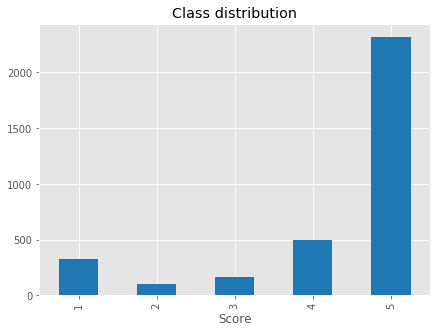

In [17]:
print(df.groupby('Score').Review.count())
df.groupby('Score').Review.count().plot.bar(figsize=(7,5), title='Class distribution', colormap='tab20')
plt.show()

The data set is hugely imbalanced. For score 2 there is only 99 examples, it is virtually impossible that a classifier learns to distinguish it. Mainly because of the number of examples, but also because the features between classes will not be very discriminant since almost any word can be in any review. The same situation occurs for score 3. For scores 1 and 4 it is better but compared to score 5 they are both vert imbalanced.

#### Review's length per class
Larger reviews contain more information and therefore could be easier to predict. If reviews corresponding to the imbalanced class are larger it might be easier for the classifier to predict them. 

In [18]:
df['review_len'] = [len(r) for r in df.Review]

In [19]:
df

,Title,Review,Score,review_len
0,My parcel arrived in 7 days and it was…,My parcel arrived in 7 days and it was exactly as advertised. I would like the delivery to be faster :),4,103
2,Fraud deliveries,"Fraud deliveries Never got my item. Doesn't offer me anything, doesn't value me as a customer. I will complain to the local authorities about my delivery.",1,154
3,The customer service is terrible in…,"The customer service is terrible in Amazon. I was having trouble with being charged from Amazon for no reason. They claimed that I have the kindle membership and also the kindle music. I talked to the bank and disputed, but I got charges every month. Then I called Amazon trying to resolve the issue, they are not very cooperative. I recommend anyone who has Amazon account to check if they are charged mysteriously from them. Their stock price and revenue continue to be up, but I am question if it is because of the reason I just stated above. At the end, I gave up, I have to cancel my credit card and concluded it as a fraud to get my money back. It is a terrible process.",2,681
4,Hopeless delivery service,"I ordered 5 items on Sunday for delivery on Tuesday and Wednesday. An inflatable dinghy and accessories. The accessories arrived along with a drum kit, no dinghy, now I have an engine to attach to a bass drum, I doubt it will float! I sent Amazon feedback about the picture they send confirming delivery two days ago, no contact from them at all! On their website this morning, no way to contact someone, but I can return my dinghy if I wish! Chance would be a fine thing. Avoid dealing with this company, in theory the offering is good, but if you can mistake a dinghy for a drum kit, well enough said. I'll update if anyone bothers to contact me!",1,648
7,I've been doing business with Amazon…,I've been doing business with Amazon for years. the is always super user friendly and knows me by name..it is awesome!,5,119
8,"Reliable, just pay attention sometimes","I often buy on Amazon goods that I can't find anywhere else. Choice is amazing and I can (almost) always find what I am looking for. I make a couple of orders every month. During the years, only twice my packages were lost I have been refunded promptly. Another time I received an item (a t-shirt) with the wrong color, and again they promptly replaced it.Just be aware of shops when the sale and shipment is not handled exclusively by Amazon. Check their rating carefully. Amazon is filtering and checking quality a lot but a ""black sheep"" can always be met.",4,559
9,Amazon search engine manipulates…,Amazon search engine manipulates consumers buying options as it add in relevant products to your list.,3,102
11,Amazon India,"Amazon India, a shameless #ecommerce brand in #India, they can repeat the same fault no of times even I've faced the same problem more then 3 times. I personally recommend never trust on Amazon India",1,199
12,Whats going on with Amazon,Whats going on with Amazon? Items never coming or they are damaged. I decided to give them one more chance and now 2 days have passed and the item is not even dispatched yet!You are loosing me,2,192
13,Fantastic! Brilliant!! Amazing!!!,"Never had any issues, they have spoilt me for other online shops because of the choice, price and amazing swift prime delivery.Order a lot of things from amazon on like training supplements, phone covers and cables, clothes, healthy snacks, cleaning products etc. The choice of products and range within each product category is fantastic!! Had prime for a long time now and can't fault it at all!! Well worth the money between the tv, extra deals and swift guaranteed delivery!!! Will continue to be a loyal customer for years to come.",5,537


In [20]:
print(df.groupby('Score').review_len.mean())
print(df.groupby('Score').review_len.max())
print(df.groupby('Score').review_len.min())

Score
1    692.975535
2    432.571429
3    321.981707
4    214.175649
5    171.586994
Name: review_len, dtype: float64
Score
1    9951
2    1829
3    3140
4    2490
5    3336
Name: review_len, dtype: int64
Score
1    13
2    12
3    12
4    11
5    10
Name: review_len, dtype: int64


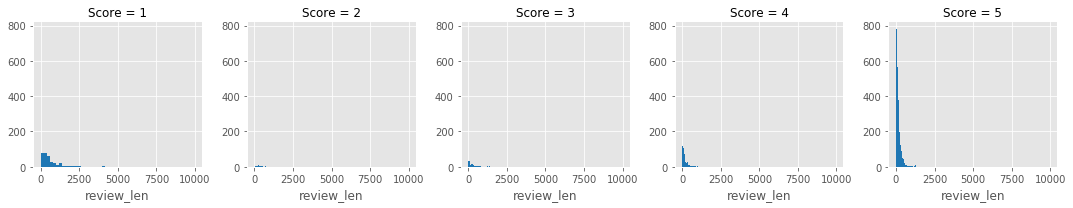

In [21]:
grid = sn.FacetGrid(data=df, col='Score')
histograms = grid.map(plt.hist, 'review_len', color='tab:blue', bins=50)

It is not the case we hypothesized. Reviews for lower scores are shorter than for higher scores. In addition, the length of the reviews within a class varies a lot.

#### Word cloud per class


In [22]:
def plot_word_cloud(data_series):
    """
    Plots a word cloud for the data in data_series.
    """

    def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
        return "hsl(%d, %d%%, %d%%)" % (random.randint(180, 220), random.randint(40, 60), random.randint(40, 60))

    wc = WordCloud(width=1600, height=800, max_font_size=200, stopwords=STOPWORDS, background_color='white', random_state=42).generate(data_series)
    plt.figure(figsize=(12,10))
    plt.imshow(wc.recolor(color_func=color_func, random_state=42), interpolation="bilinear")
    plt.axis("off")
    plt.show()
    

In [23]:
# Flatten reviews for the word cloud
score_series = []
for score in range(1,6):
    reviews = df[df.Score == score]
    scores = [] 
    for review in reviews.Review:
        scores.append(review)
    score_series.append(pd.Series(scores).str.cat(sep=' '))

Score 1


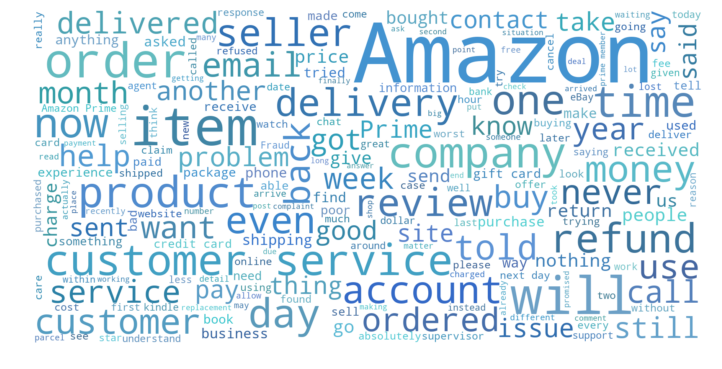

Score 2


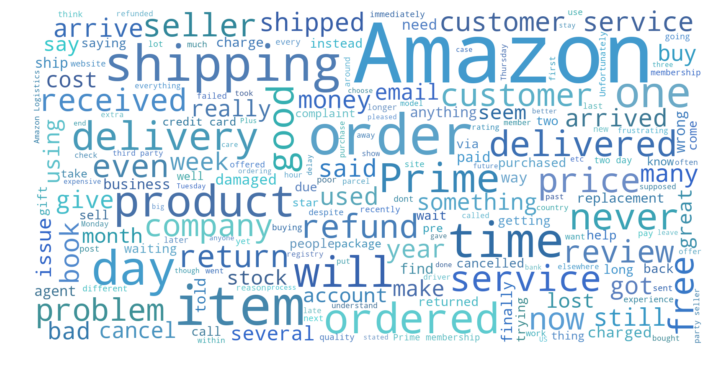

Score 3


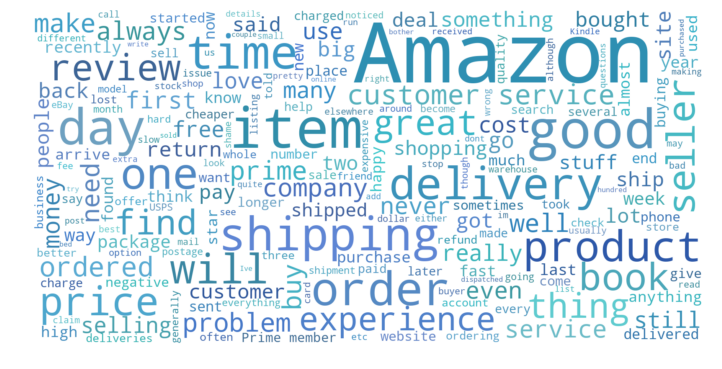

Score 4


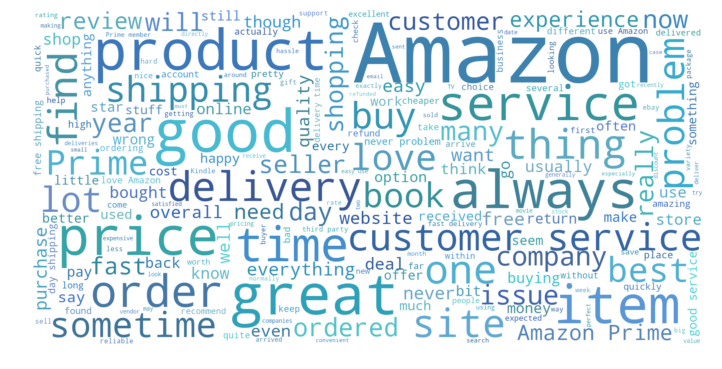

Score 5


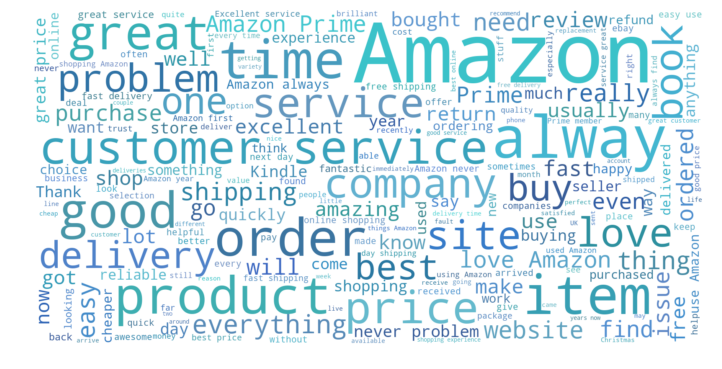

In [24]:
for i in range(5):
    print('Score ' + str(i+1))
    plot_word_cloud(score_series[i])

The word clouds show some common words across classes such as delivery, product, shipping which probably change the meaning according to the context of the review. Therefore, just from individual words it is hard to see what the user is saying. It is hard to find single words that characterised a class. Adjective help in that as 'great' and 'love' appear in higher classes. The word 'good' gets bigger with the classes but it also appears in the lowest classes. This could be due to some mislabelled examples. However, checking for that below, it shows that it is part of negated sentences such as 'any good'. This shows how important is context for this problem.

In [25]:
# Search for mislabeled examples since in the wordcloud we had the word 'good'
df.loc[(df['Score'] == 2) & (df['Review'].str.contains('good'))]

,Title,Review,Score,review_len
180,Not worth the effort all these Amazon sellers,"Ordered quite a lot of products with a couple of them and around 30% of them were faulty. That's way too much. Plus, when it comes to refunds the customer service only supports the seller. One more faulty product I get and I will finally say goodbye to you Amazon.",2,264
206,Wary of ordering expensive items again.,"Wary of ordering expensive items again.I had ordered an xbox one x, which was supposed to be delivered a Saturday which never turned up, however had been marked as signed for and delivered. I was waiting in all day, and had no knock on the door.Was then said to be delivered Sunday instead, however that never arrived. Was then told they would not give me a refund while it was under investigation. Many calls and complaints I eventually got my money back via gift card. Had to re-order and eventually got it the Tuesday.Then had a knock on the door, from their investigations team with the driver, who I had never seen. Just to explain again, there was never a knock at the door, I never signed for it etc. And the driver confirmed he did not remember the address.Never heard anything of it since and was not offered any good will gesture, despite the amount of hassle and upset they had caused, due to it being a present that was very late.Will still order low value items, however never expensive orders again.",2,1013
460,AMAZON gives international customers the finger by using ARAMEX,"AMAZON why are you still using ARAMEX to ship to your international customers ? If you have any concern whatsoever for your international customers you would immediately switch to a proper reputable courier.It is obvious ARAMEX couldn't care less about having you as a customer, so why persist with this useless company ? Their deliveries are constantly late and there is zero communication / feedback from them to the customer. I know you are aware of their dismal service because the internet is saturated with people complaining about them and vowing not to buy from AMAZON because of this. (I am 1 of them).It really does your reputation no good to be associated with such a disreputable company.",2,701
587,They have removed honest bad reviews …,"They have removed honest bad reviews from products making it seem like every product on amazon only has good reviews. More and more often they are failing to ship me products and their offshore customer support is completely useless. When I have contacted them about removing 1 star reviews I have posted for some truely terrible products, they tried to pay me off with amazon credit instead of putting my reviews back.",2,419
656,Frustrated,"I used to love shopping in Amazon due to superb services and quality goods but the experience I have had with Amazon is really frustrating. For the last three orders, all the orders was notified as ""shipped"" and then ""lost in transit"" and then I have had to contacted Amazon many times to solve the problems which have not been solved yet. Some items have not been delivered to me even though the order was placed in the mid of August. The worst part is that one of items is a gift (then they offered me free Expedited Delivery but I am just not sure whether they can be delivered on time). I do not what is going on with the Amazon. I assume that the rapid growth and expansion, the quality assurance is not met.",2,715
666,Poor,Poor . bad . Not a very good website for buying world wide The taxes are very high and the shipping price gets more than 150 dollars i wont buy or sell from that website again,2,175
851,For me,"For me, you find out how good a company is when you've experienced a problem. I've shopped with Amazon for several years and never had a problem. However, I had a problem lately which showed me how really bad their customer service is. As a result, I will be avoiding using Amazon again.",2,290
958,"Very often displayed ""in Stock"" and …","Very often displayed ""in Stock"" and finally

In [26]:
df.loc[(df['Score'] == 5) & (df['Review'].str.contains('issue'))]

,Title,Review,Score,review_len
13,Fantastic! Brilliant!! Amazing!!!,"Never had any issues, they have spoilt me for other online shops because of the choice, price and amazing swift prime delivery.Order a lot of things from amazon on like training supplements, phone covers and cables, clothes, healthy snacks, cleaning products etc. The choice of products and range within each product category is fantastic!! Had prime for a long time now and can't fault it at all!! Well worth the money between the tv, extra deals and swift guaranteed delivery!!! Will continue to be a loyal customer for years to come.",5,537
71,I love AMAZON,"I love AMAZON. I literally could not live without it, order something the day before and get it the next day!! Ideal for any emergency. Delivery on most items is cheap.My only recommendation is that they vet some of the people selling things, purely for standard issues with some items. But overall, I could not fault the service or utility of this website",5,356
98,What's not to love!,"I have ordered a lot of stuff in my time being with Amazon, a lot more than I should publicly admit. Whenever I have ordered anything from them it has always been delivered on time to what they estimate and in good condition. Even when there have been times that the product was just not right or faulty for whatever reason, their refund system has always been easy and straight forward to use. Although I'd have to say that their Pass the Parcel scheme is good in practice it's just not best when you go to one of these designated places and they look down upon you for daring to do a refund in their shop. But clearly not an Amazon issue. My only issue and it would be more search related is that some items are cryptically hidden on the website so you will need to be really specific or it may just not be on there. If I'm searching for a Man United baby-grow I will most certainly be offended if you suggest a Liverpool one!",5,928
118,Always fast and reliable,"Always fast and reliable. Any issues, just return for a refund!",5,64
146,To be or not to be prime member...?,"For the prime membership is it worth the extra £79 a year. Thats a tough one. But i will say customer service is excellent. Ive had issues with several rogue companies selling dodgy products and obviously if its a company like ebay well you can wait months to get anything back if at all. Amazon deal with issues straight away, and refunds are instant which to be honest i love. Id rather pay a little more than subject myself to the hassle of chasing money owed with no back up what so ever, yes that would be ebay again. And dont get me started on paypal. Thats a joke. Billion dollar companies that cant be bothered to sort out a decent app that works on your mobile well is just well stupid in this day and age. The amazon app ive never had a problem with. Order, pay, print FREE return labels is a doddle. Ebay and paypal app are probably the worst things on my phone, way too buggy imo",5,891
150,Excellent return policy,"Excellent return policy, excellent customer service, excellent pricing. We decided to go with prime to see if it paid for it's self in shipping charges, shipping time, and other perks. We are more than happy with that choice. The few times I have had to contact amazon for issues were resolved quickly and professionally by them. My experiences have been very positive.",5,369
156,Excellent return policy,"Excellent return policy, excellent customer service, excellent pricing. We decided to go with prime to see if it paid for it's self in shipping charges, shipping time, and other perks. We are more than happy with that choice. The few times I have had to contact amazon for issues were resolved quickly and professionally by them. My experiences have been very positive.",5,373
158,I have used Amazon for my regular shopping needs.,"I use Amazon regularly to shop for electronic and household items. It is the ultimate online shopping experience. On time delivery and gre

In [27]:
# Explore minority class
df.loc[df['Score'] == 2]

,Title,Review,Score,review_len
3,The customer service is terrible in…,"The customer service is terrible in Amazon. I was having trouble with being charged from Amazon for no reason. They claimed that I have the kindle membership and also the kindle music. I talked to the bank and disputed, but I got charges every month. Then I called Amazon trying to resolve the issue, they are not very cooperative. I recommend anyone who has Amazon account to check if they are charged mysteriously from them. Their stock price and revenue continue to be up, but I am question if it is because of the reason I just stated above. At the end, I gave up, I have to cancel my credit card and concluded it as a fraud to get my money back. It is a terrible process.",2,681
12,Whats going on with Amazon,Whats going on with Amazon? Items never coming or they are damaged. I decided to give them one more chance and now 2 days have passed and the item is not even dispatched yet!You are loosing me,2,192
16,customer care is poor,"customer care is poor, takes ages getting through",2,49
45,Very poor delivery service I think considering Amazon is a…,I think considering Amazon is a multi-billion pound company they should give you an average time when your parcel will be delivered instead of having to wait in from 8 o'clock in the morning till 9 at night for your parcel to get delivered they say they can leave it somewhere but what if you don't have anywhere to leave it as it will get stolen I think it is ridiculous and they need to look into this matter to give people around about time your parcel will be getting delivered instead of having to hang around all day especially on a Day Like This with the sun is shining you don't get many they seem to be up to date with everything else so why not delivery times,2,669
48,they have gotten to big for their…,"they have gotten to big for their britches, & don't care about standing behind what they have sold to us !",2,106
83,I have been an Amazon customer for over…,I have been an Amazon customer for over ten years. The customer service has truly declined in the past few years. Mostly because information gets lost in translation. They will not even do price adjustments on there own products. But the worse is if you do any trading with them you will get ripped off if you don't stay on top of them. I have had many bad trading experiences with them.,2,391
109,I ordered a book online,"I ordered a book online, and it was meant to be hardcover but it was just paperback...even though it specifically said hardcover book..",2,135
115,Orders a iPad and got a fake iPad with…,Orders a iPad and got a fake iPad with a brick stuffed inside.....watch out,2,75
132,Not what they used to be,"Ok. They probably do deserve better than 2 stars, but I'm comparing them to what they were 2 years ago. It appears if you are not willing to pay them $120 per year for the honor of Prime membership, you are not worth waiting on. I have seen numerous items lately that are only available to Prime members. What? I can't buy something because I do not pay you an annual fee? I made a purchase on Walmart.com on 4/28. I received it on 5/2. I made a purchase at Amazon.com on 4/29. It's 5/4 and it hasn't even shipped yet. I'll make every effort to order from other vendors in the future.",2,584
173,Couldn't speak to anyone directly!!!,Couldn't speak to anyone directly!!!,2,36


The data set exploration reveals the following:
* How the users write messages: they use punctuation and exclamation and emojis.
* The title is, in a lot of the cases, a summary of the true feeling, so it is useful.
* There is no interesting pattern in the length that the classifier can leverage. If anything, only worsens the imbalance.
* The feeling is expressed in the combination of words more than in individual words. Users do not enumerate adjectives as review but they ellaborate stories that create context.

## Cleaning the data

To clean the data, we remove:
* Any emojis, since this are not interpretable my the classifier.
* Punctuation symbols, since they do not discriminate between ratings of the reviews (both positive and negatives can have exclamations, for instance) and punctuation does not add any value to this task.
* Lowercasing, same as for punctuation.
* Numbers, they increase the feature space without adding any value to the task.
* Any accidentally double spaces by tokenizing and then joining back.
* Apply lemmatization (optionally), even though is doesn't always help, it reduces the feature space.

In [28]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    
def clean_sentence(sentence, lemmatize=False):
    """
    Function to clean a sentence by removing punctuation, double spaces, urls, 
    normalizing numbers, lowercasing and removing emojis.
    
    Args:
        sentence: str, the sentence.
        lemmatize: bool, whether to lemmatize the sentence.
    
    Returns:
        final_sentence: str, cleaned sentence.
        
    """
    
    sentence_tokens = nlp(sentence)
    final_tokens = []
    for token in sentence_tokens:
        if token.is_punct or token.is_space or token.like_url or token.like_num or emoji_pattern.match(str(token)):
            pass
        elif lemmatize:
            if token.lemma_ == '-PRON-':
                # Append the pronoun and not -PRON- that spacy gives.
                final_tokens.append(str(token))
            else:
                final_tokens.append(str(token.lemma_))
        else:
            final_tokens.append(token.text.lower())
    
    final_sentence = ' '.join(final_tokens) 
    
    return final_sentence       

In [29]:
df['clean_review'] = [clean_sentence(review, lemmatize=True) for review in df.Review]

In [30]:
df['clean_title'] = [clean_sentence(title, lemmatize=True) for title in df.Title]

In [31]:
df['clean_merge'] = [" ".join([title, review]) for title, review in zip(df.clean_title, df.clean_review)]

In [36]:
df

,Title,Review,Score,review_len,clean_review,clean_title,clean_merge
0,My parcel arrived in 7 days and it was…,My parcel arrived in 7 days and it was exactly as advertised. I would like the delivery to be faster :),4,103,My parcel arrive in day and it be exactly as advertise I would like the delivery to be fast,My parcel arrive in day and it be,My parcel arrive in day and it be My parcel arrive in day and it be exactly as advertise I would like the delivery to be fast
2,Fraud deliveries,"Fraud deliveries Never got my item. Doesn't offer me anything, doesn't value me as a customer. I will complain to the local authorities about my delivery.",1,154,fraud delivery never get my item do not offer me anything do not value me as a customer I will complain to the local authority about my delivery,fraud delivery,fraud delivery fraud delivery never get my item do not offer me anything do not value me as a customer I will complain to the local authority about my delivery
3,The customer service is terrible in…,"The customer service is terrible in Amazon. I was having trouble with being charged from Amazon for no reason. They claimed that I have the kindle membership and also the kindle music. I talked to the bank and disputed, but I got charges every month. Then I called Amazon trying to resolve the issue, they are not very cooperative. I recommend anyone who has Amazon account to check if they are charged mysteriously from them. Their stock price and revenue continue to be up, but I am question if it is because of the reason I just stated above. At the end, I gave up, I have to cancel my credit card and concluded it as a fraud to get my money back. It is a terrible process.",2,681,the customer service be terrible in amazon I be have trouble with be charge from amazon for no reason They claim that I have the kindle membership and also the kindle music I talk to the bank and dispute but I get charge every month then I call amazon try to resolve the issue they be not very cooperative I recommend anyone who have amazon account to check if they be charge mysteriously from them Their stock price and revenue continue to be up but I be question if it be because of the reason I just state above at the end I give up I have to cancel my credit card and conclude it as a fraud to get my money back It be a terrible process,the customer service be terrible in,the customer service be terrible in the customer service be terrible in amazon I be have trouble with be charge from amazon for no reason They claim that I have the kindle membership and also the kindle music I talk to the bank and dispute but I get charge every month then I call amazon try to resolve the issue they be not very cooperative I recommend anyone who have amazon account to check if they be charge mysteriously from them Their stock price and revenue continue to be up but I be question if it be because of the reason I just state above at the end I give up I have to cancel my credit card and conclude it as a fraud to get my money back It be a terrible process
4,Hopeless delivery service,"I ordered 5 items on Sunday for delivery on Tuesday and Wednesday. An inflatable dinghy and accessories. The accessories arrived along with a drum kit, no dinghy, now I have an engine to attach to a bass drum, I doubt it will float! I sent Amazon feedback about the picture they send confirming delivery two days ago, no contact from them at all! On their website this morning, no way to contact someone, but I can return my dinghy if I wish! Chance would be a fine thing. Avoid dealing with this company, in theory the offering is good, but if you can mistake a dinghy for a drum kit, well enough said. I'll update if anyone bothers to contact me!",1,648,I order item on sunday for delivery on tuesday and wednesday an inflatable dinghy and accessory the accessory arrive along with a drum kit no dinghy now I have an engine to attach to a bass drum I doubt it will float I send amazon feedback about the picture they 